In [69]:
import os
os.environ["OMP_NUM_THREADS"] = "2"

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import adjusted_rand_score,confusion_matrix

In [71]:
x_pca= pd.read_csv('../processed/x_pca.csv')
x_pca

,PC1,PC2
0,1.230517,0.190117
1,-0.767382,2.666396
2,3.053663,1.697289
3,-0.991935,1.073267
4,-1.876149,0.579699
...,...,...
279,1.773828,-2.051658
280,3.080810,0.745618
281,2.559431,-0.573585
282,-1.932211,0.451198


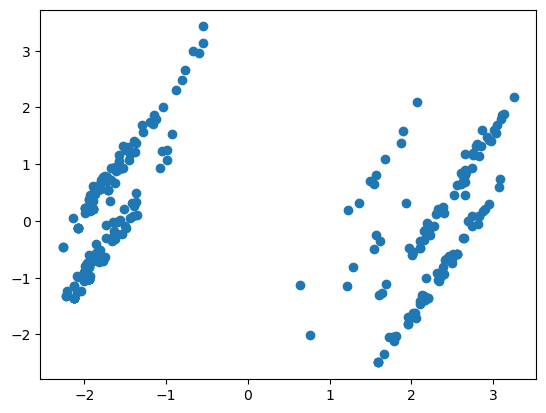

In [72]:
plt.scatter(x_pca['PC1'],x_pca['PC2'])

Before Scaling

In [73]:

km = KMeans(n_clusters=2)
y_pred = km.fit_predict(x_pca[['PC1','PC2']])
x_pca['Cluster']=y_pred
x_pca


,PC1,PC2,Cluster
0,1.230517,0.190117,0
1,-0.767382,2.666396,1
2,3.053663,1.697289,0
3,-0.991935,1.073267,1
4,-1.876149,0.579699,1
...,...,...,...
279,1.773828,-2.051658,0
280,3.080810,0.745618,0
281,2.559431,-0.573585,0
282,-1.932211,0.451198,1


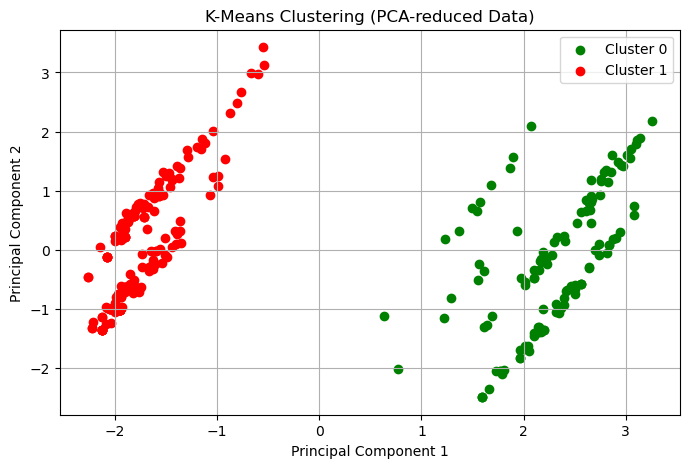

In [74]:
km.cluster_centers_
df1=x_pca[x_pca.Cluster==0]
df2=x_pca[x_pca.Cluster==1]


plt.figure(figsize=(8, 5))
plt.scatter(df1['PC1'], df1['PC2'], color='green', label='Cluster 0')
plt.scatter(df2['PC1'], df2['PC2'], color='red', label='Cluster 1')


plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering (PCA-reduced Data)')
plt.legend()
plt.grid(True)
plt.show()

In [75]:
scaler=MinMaxScaler()
x_pca['PC1']=scaler.fit_transform(x_pca[['PC1']])
x_pca['PC2']=scaler.fit_transform(x_pca[['PC2']])

x_pca

,PC1,PC2,Cluster
0,0.633421,0.453299,0
1,0.271270,0.871606,1
2,0.963895,0.707899,0
3,0.230566,0.602485,1
4,0.070288,0.519109,1
...,...,...,...
279,0.731905,0.074605,0
280,0.968816,0.547137,0
281,0.874308,0.324290,0
282,0.060126,0.497402,1


In [76]:

km = KMeans(n_clusters=2)
y_pred = km.fit_predict(x_pca[['PC1','PC2']])
x_pca['Cluster']=y_pred
x_pca


,PC1,PC2,Cluster
0,0.633421,0.453299,1
1,0.271270,0.871606,0
2,0.963895,0.707899,1
3,0.230566,0.602485,0
4,0.070288,0.519109,0
...,...,...,...
279,0.731905,0.074605,1
280,0.968816,0.547137,1
281,0.874308,0.324290,1
282,0.060126,0.497402,0


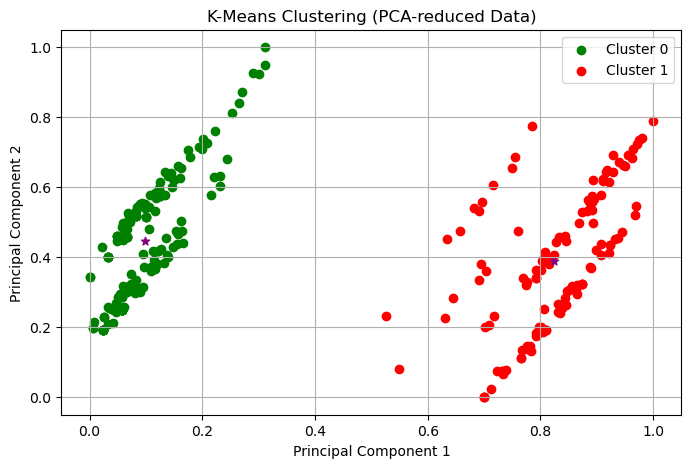

In [77]:
km.cluster_centers_
df1=x_pca[x_pca.Cluster==0]
df2=x_pca[x_pca.Cluster==1]


plt.figure(figsize=(8, 5))
plt.scatter(df1['PC1'], df1['PC2'], color='green', label='Cluster 0')
plt.scatter(df2['PC1'], df2['PC2'], color='red', label='Cluster 1')


plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering (PCA-reduced Data)')
plt.legend()
plt.grid(True)
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*')
plt.show()

Elbow Method

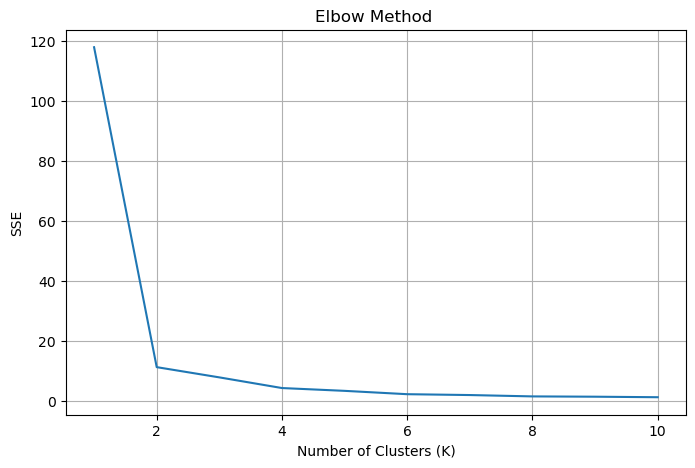

In [78]:
sse = []  #sum squared error
k_range = range(1, 11)

for k in k_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(x_pca)  
    sse.append(km.inertia_) #calculate sum of sqaured err

plt.figure(figsize=(8, 5))
plt.plot(k_range, sse)
plt.title('Elbow Method ')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('SSE')
plt.grid(True)
plt.show()


Hierarchical Clustering

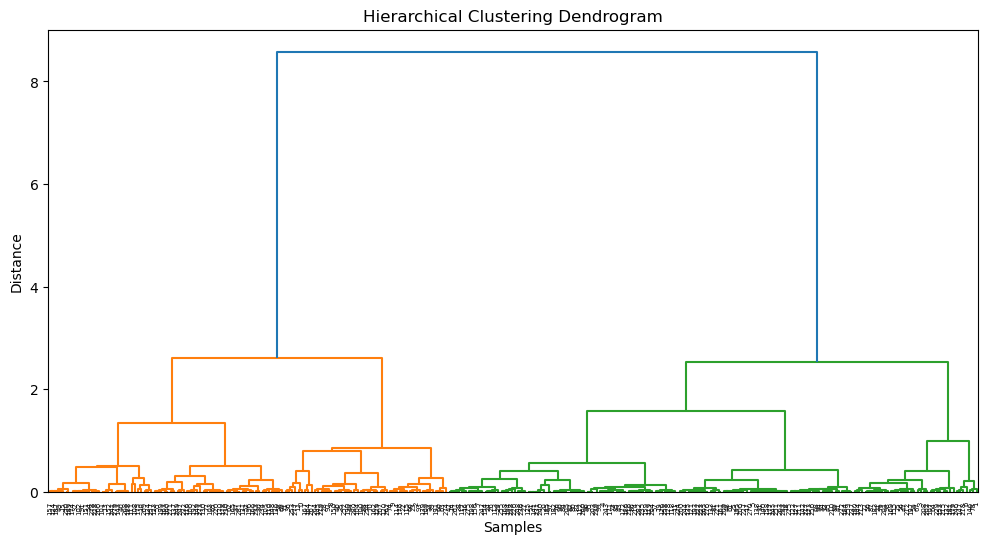

In [79]:
#perform Hierarchical Clustering on features
linked=linkage(x_pca[['PC1','PC2']], method='ward',metric='euclidean') #method : for calculating distance between clustring

plt.figure(figsize=(12, 6))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=False)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()

Compare clusters with actual disease labels

In [80]:
target=pd.read_csv('../processed/target.csv')
target.columns=['target']

x_pca['target']=target['target']

#to know how clusters match true label
ARI=adjusted_rand_score(x_pca['target'],x_pca['Cluster']) #1 perfect , 0 random , <0 the worset
print(f"Adjusted Rand Index: {ARI:.2f}")


conf_mat=confusion_matrix(x_pca['target'],x_pca['Cluster'])
print(f'confution matrix {conf_mat}')

Adjusted Rand Index: 0.28
confution matrix [[127  31]
 [ 35  91]]
